## <p style="text-align: center;">**Laboratory Session** : May 21, 2024</p>
#### <p style="text-align: center;">Exercises due on : June 3, 2024</p>

**Student**: Cavezza Lorenzo <br>
**Matricola**: 2130648

In [315]:
library("glue")
library("lubridate")
library(ggplot2)
library(tidyverse)
library(actuar)
library("R2jags")

### Exercise 1

- given the following un-normalized posterior distribution

#### <center>$g(\theta|x)\propto\frac{1}{2}exp-\frac{(\theta+3)^2}{2}+\frac{1}{2}exp-\frac{(\theta-3)^2}{2}$
- draw a Markov Chain from the posterior distribution using a Metropolis-Hastings algorithm

In [195]:
# Parameters :
# func : a function whose first argument is a real vector of parameters
# func returns a log10 of the likelihood function
# theta.init : the initial value of the Markov Chain (and of func)
# n.sample: number of required samples
# sigma : standar deviation of the gaussian MCMC sampling pdf
metropolis.1dim <- function (func , theta.init , n.sample , sigma) {
theta.cur <- theta.init
func.Cur <- func(theta.cur)
func.Samp <- matrix(data=NA , nrow=n.sample , ncol=2+1)
n.accept <- 0
rate.accept <- 0.0
for (n in 1:n.sample) {
theta.prop <- rnorm(n=1, mean = theta.cur , sigma)
func.Prop <- func(theta.prop)
logMR <- func.Prop - func.Cur # Log10 of the Metropolis ratio
if ( logMR >=0 || logMR >log10(runif(1)) ) {
theta.cur <- theta.prop
func.Cur <- func.Prop
n.accept <- n.accept + 1
}
func.Samp[n, 1] <- func.Cur
func.Samp[n, 2] <- theta.cur
}
return(func.Samp)
}

In [196]:
#Test Function
testfunc <- function (theta) {
return(0.5* ( exp(-((theta+3)**2) * 0.5) + exp(- ((theta-3)**2 ) * 0.5)))
}
#
# - interface for the metropolis function , gets the log10 of test function
testfunc.metropolis <- function (theta) {
return(log10( testfunc (theta )))
}
### Running parameters
theta.init <- -10
sample.sig <- 10
n.sample <- 10**5
demo <- TRUE
set.seed(20190513)
chain <- metropolis.1dim(func=testfunc.metropolis ,
theta.init = theta.init ,
n.sample = n.sample ,
sigma = sample.sig)


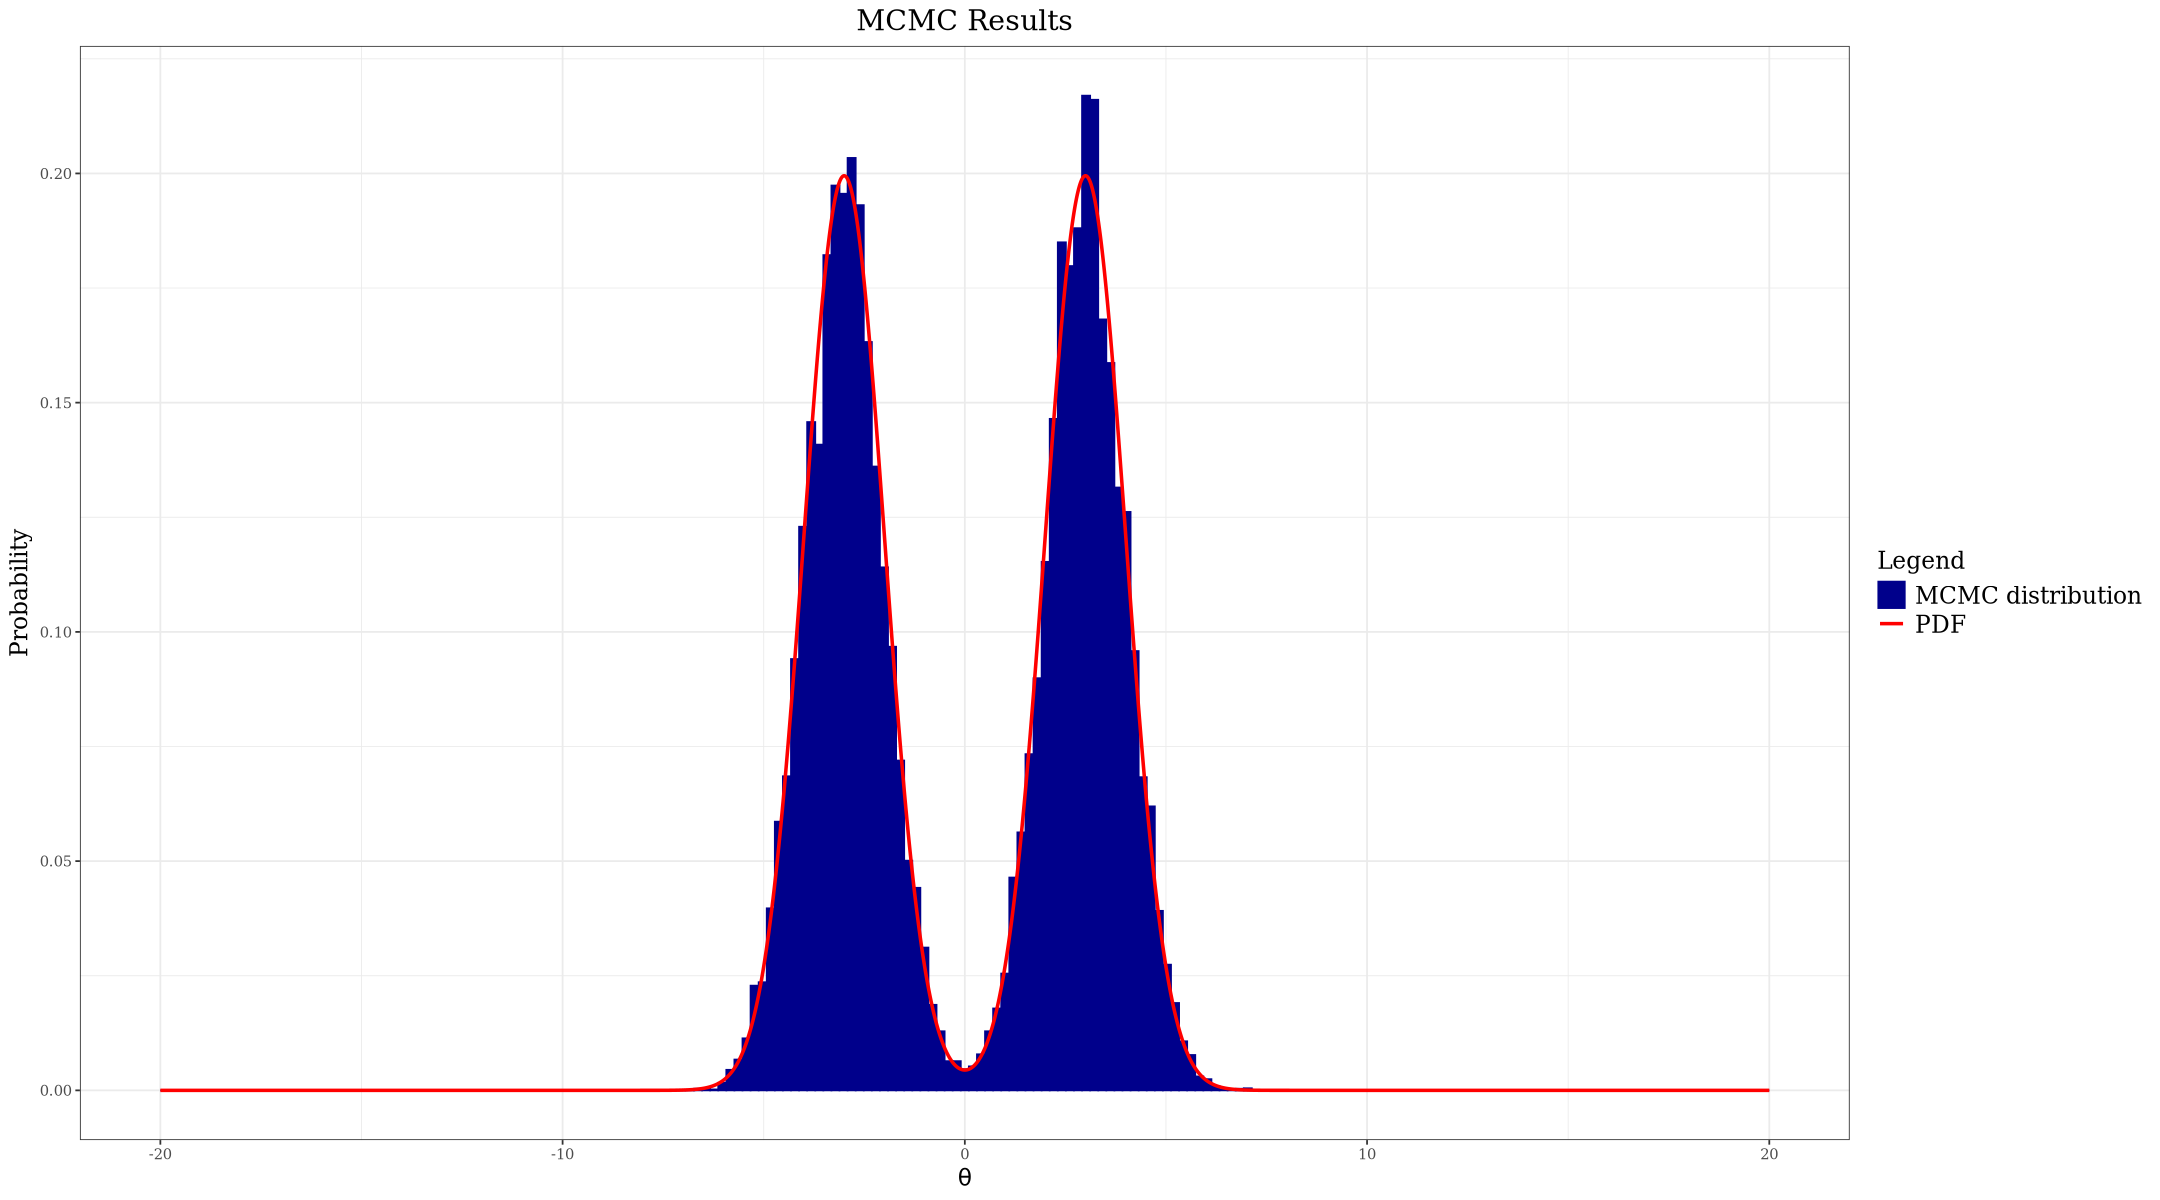

In [217]:
#PLOTS
seq.length=10000
x <- seq(-20, 20, length.out=seq.length)
breaks =seq(from=min(x), to=max(x),length.out=200)
y <- testfunc (x)
norm<-sum(y)*diff(range(x))/seq.length
y<-y/norm
ymax <- 1.05 * max(y)
sa <- which(chain[,2]>=min(x)&chain[,2]<=max(x))
Zhist <- sum(hist$counts )* diff(range(hist$breaks ))/( length(hist$counts ))



options(repr.plot.width = 18, repr.plot.height = 10)
p<-ggplot(data.frame(chain[sa ,2]),aes(x=chain[sa ,2]))+
geom_histogram(breaks=breaks,aes(y=after_stat(count)/(sum(after_stat(count))*diff(range(breaks ))/( length(after_stat(count) ))),
                                 colour="MCMC distribution"),fill="darkblue",bins=10000)+
geom_line(data=data.frame(x,y),aes(x=x,y=y,colour='PDF'),linewidth=1)+
scale_color_manual(name = "Legend", values = c("MCMC distribution" = "darkblue", "PDF" = "red"))+
labs(
title="MCMC Results",
y="Probability",
x=expression(theta),
ylim=c(0,max(y)*1.10)
)

p+theme_bw()+theme(plot.title = element_text(size=17,hjust = 0.5),axis.title=element_text(size=14),legend.text=element_text(size=14),legend.title=element_text(size=14))+
theme(text = element_text(family = "Times New Roman"))


- use a Norm (0; 1) as random-walk candidate density

In [220]:
metropolis.1dim <- function (func , theta.init , n.sample,sigma) {
theta.cur <- theta.init
func.Cur <- func(theta.cur)
func.Samp <- matrix(data=NA , nrow=n.sample , ncol=2+1)
n.accept <- 0
rate.accept <- 0.0
for (n in 1:n.sample) {
theta.prop <- rnorm(n=1, mean = 0 , sigma)
func.Prop <- func(theta.prop)
logMR <- func.Prop - func.Cur # Log10 of the Metropolis ratio
if ( logMR >=0 || logMR >log10(runif(1)) ) {
theta.cur <- theta.prop
func.Cur <- func.Prop
n.accept <- n.accept + 1
}
func.Samp[n, 1] <- func.Cur
func.Samp[n, 2] <- theta.cur
}
rate.accept<-n.accept/n.sample
func.Samp[1, 3]<-rate.accept
return(func.Samp)
}

In [225]:
#
# Our test function
#
testfunc <- function (theta) {
return(0.5* ( exp(-((theta+3)**2) * 0.5) + exp(- ((theta-3)**2 ) * 0.5)))
}
#
# - interface for the metropolis function , gets the log10 of test function
testfunc.metropolis <- function (theta) {
return(log10( testfunc (theta )))
}
### Running parameters
theta.init <- 10
sample.sig <- 1
n.sample <- 10**5
demo <- TRUE
set.seed(20190513)
chain <- metropolis.1dim(func=testfunc.metropolis ,
theta.init = theta.init ,
n.sample = n.sample,
sigma=sample.sig)


- plot the sampled distribution

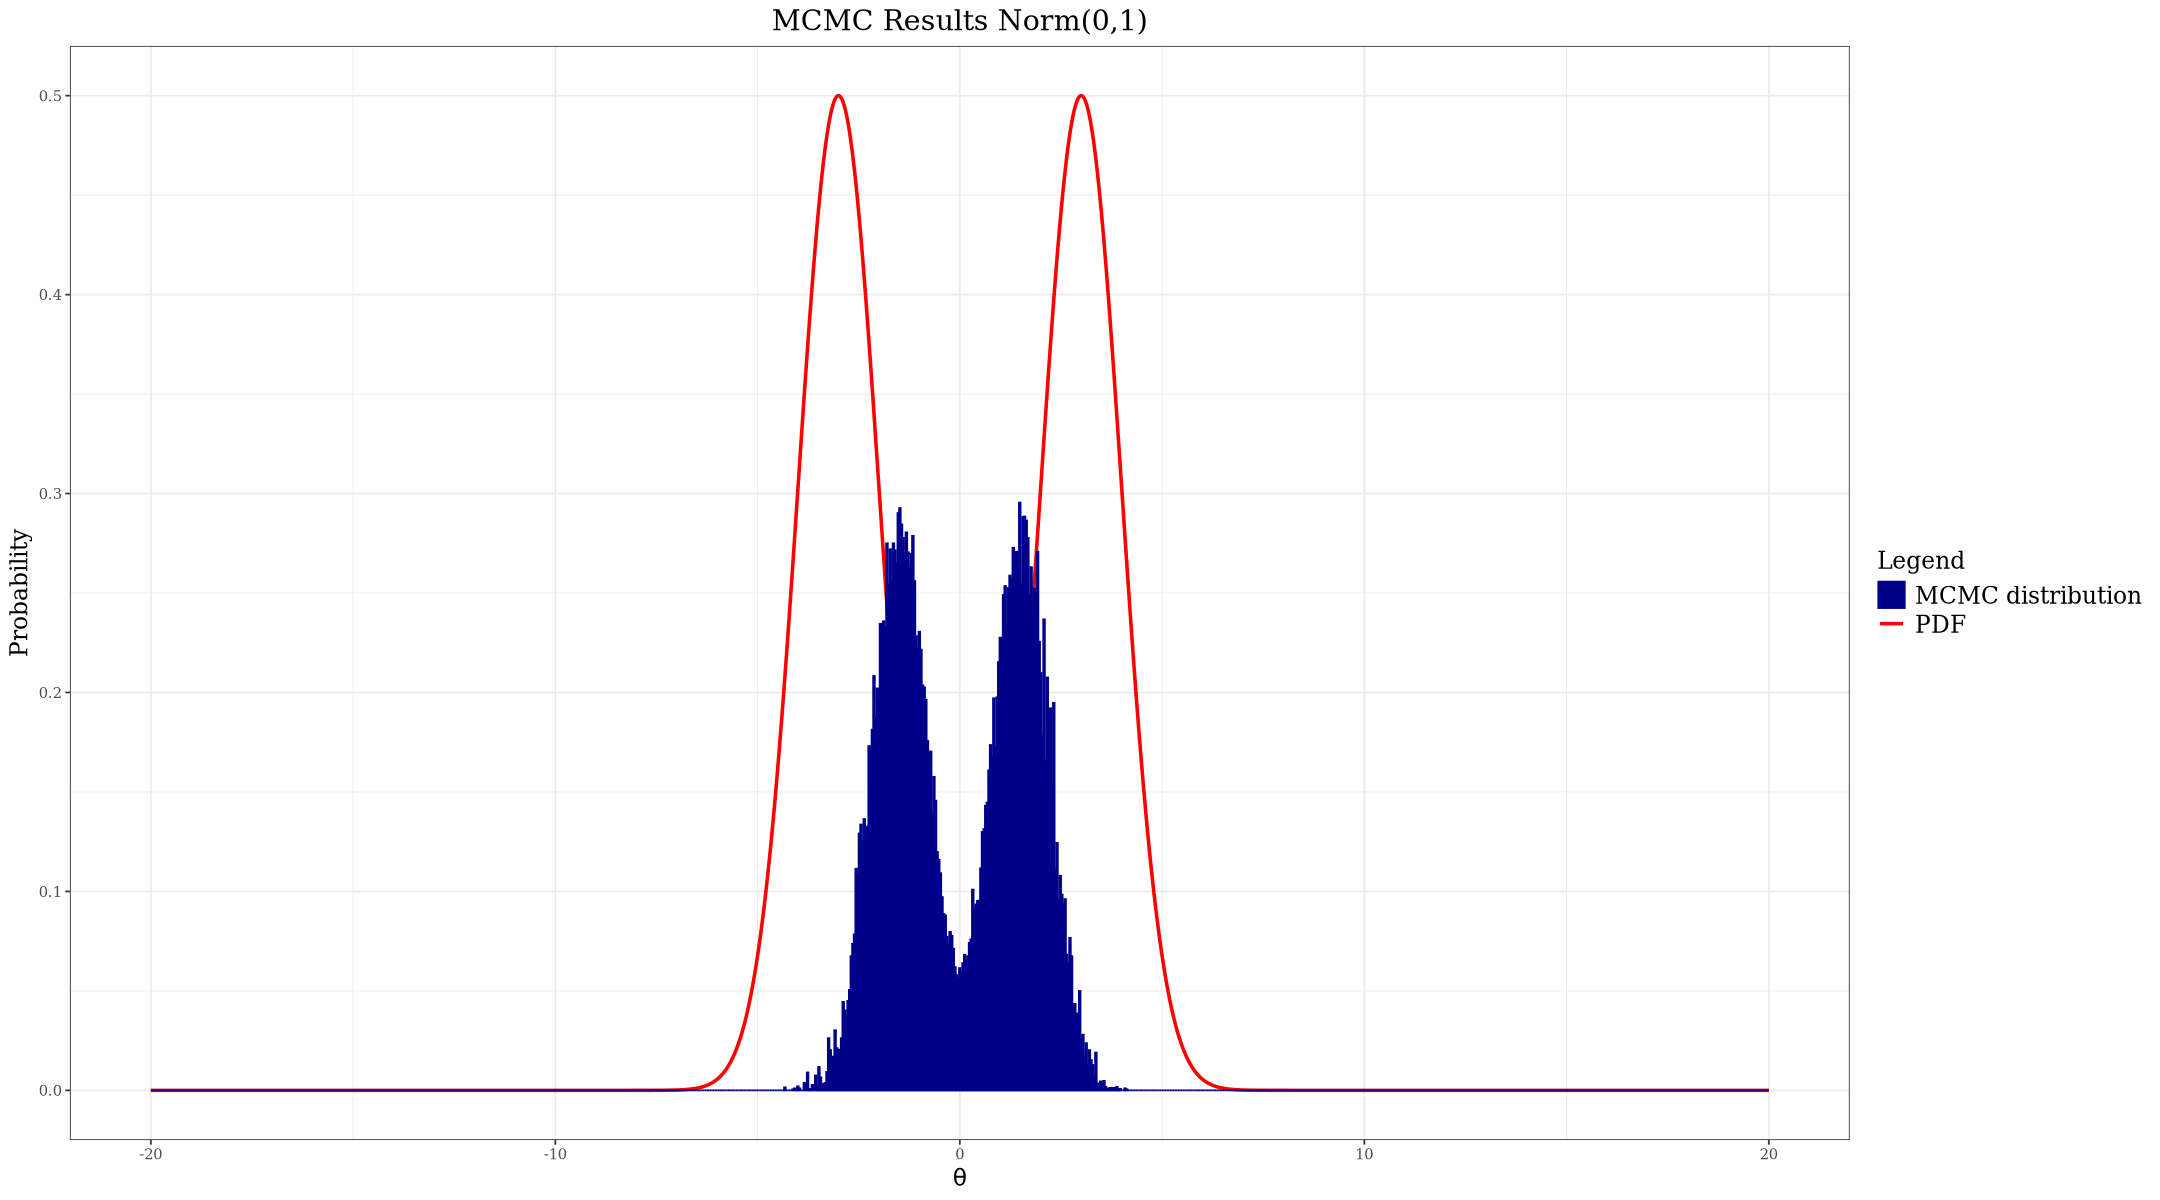

In [226]:
#PLOTS
x <- seq(-20, 20, length.out=10**4)
breaks =seq(from=min(x), to=max(x),length.out=1000)
y <- testfunc (x)
ymax <- 1.05 * max(y)
sa <- which(chain[,2]>=min(x)&chain[,2]<=max(x))
Zhist <- sum(hist$counts )* diff(range(hist$breaks ))/( length(hist$counts ))



options(repr.plot.width = 18, repr.plot.height = 10)
p<-ggplot(data.frame(chain[sa ,2]),aes(x=chain[sa ,2]))+
geom_line(data=data.frame(x,y),aes(x=x,y=y,colour='PDF'),linewidth=1)+
geom_histogram(breaks=breaks,aes(y=after_stat(count)/(sum(after_stat(count))*diff(range(breaks ))/( length(after_stat(count) ))),
                                 colour="MCMC distribution"),fill="darkblue",bins=10000)+
scale_color_manual(name = "Legend", values = c("MCMC distribution" = "darkblue", "PDF" = "red"))+
labs(
title="MCMC Results Norm(0,1)",
y="Probability",
x=expression(theta),
ylim=c(0,max(y)*1.10)
)

p+theme_bw()+theme(plot.title = element_text(size=17,hjust = 0.5),axis.title=element_text(size=14),legend.text=element_text(size=14),legend.title=element_text(size=14))+
theme(text = element_text(family = "Times New Roman"))

- analyze the chain with the CODA package and plot the chain autocorrelation

In [228]:
thinning<-1
starting<-1
MCMC=mcmc(data=chain[,1:2],start=starting,thin=thinning)

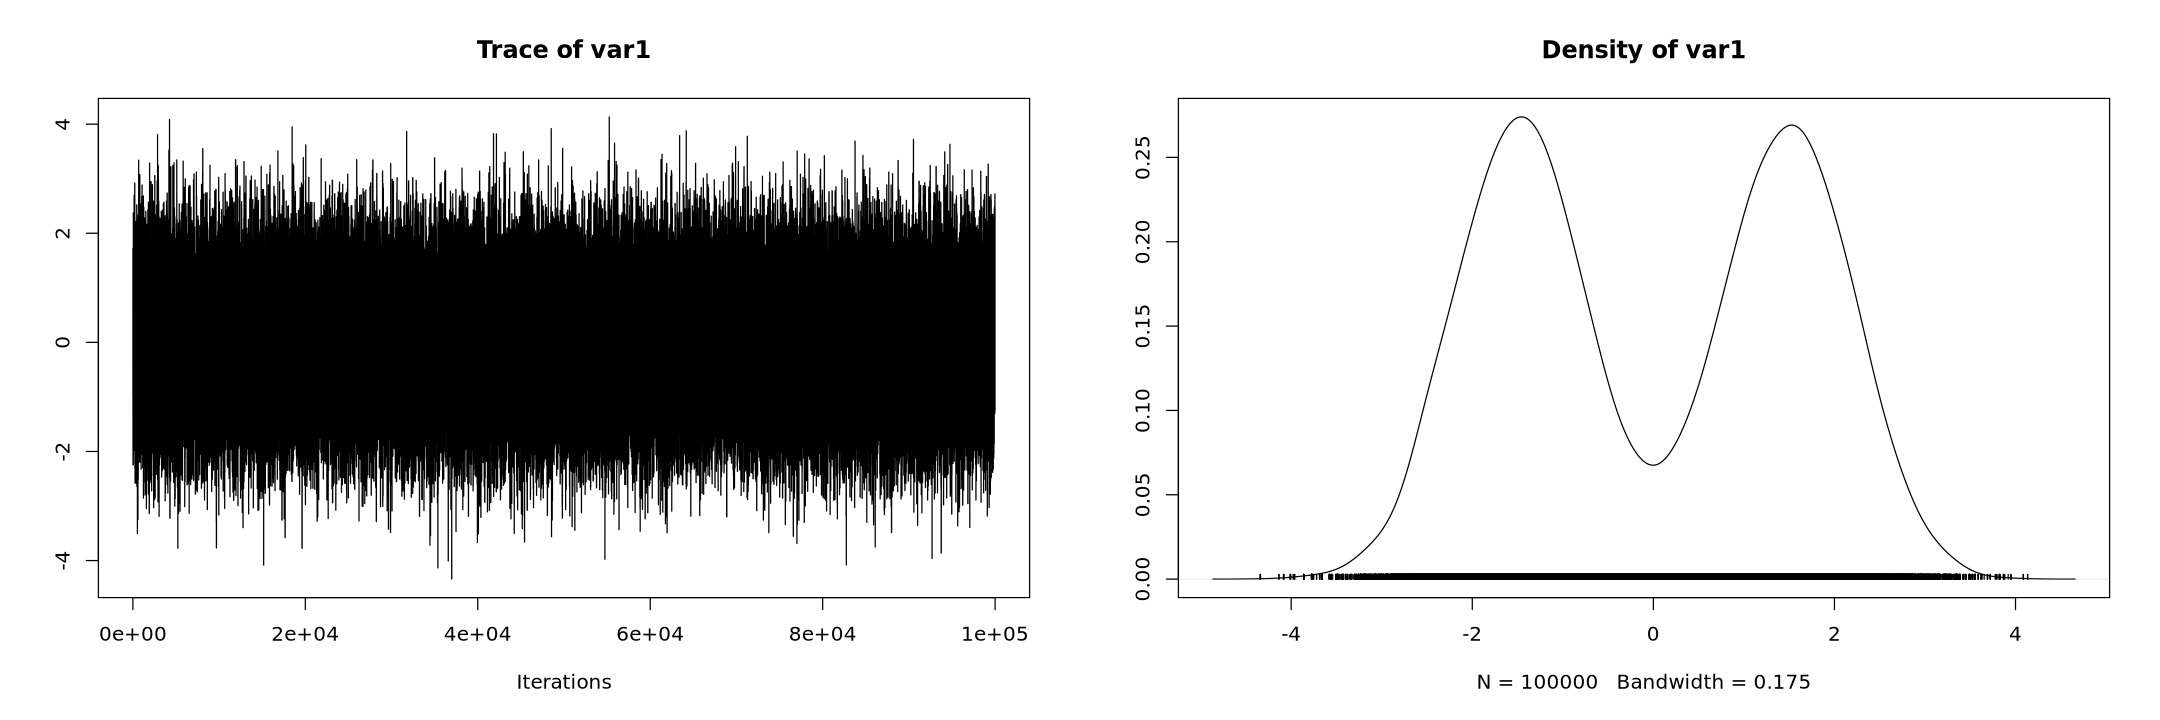

In [229]:
options(repr.plot.width = 18, repr.plot.height = 6)
plot(x=MCMC[,2])

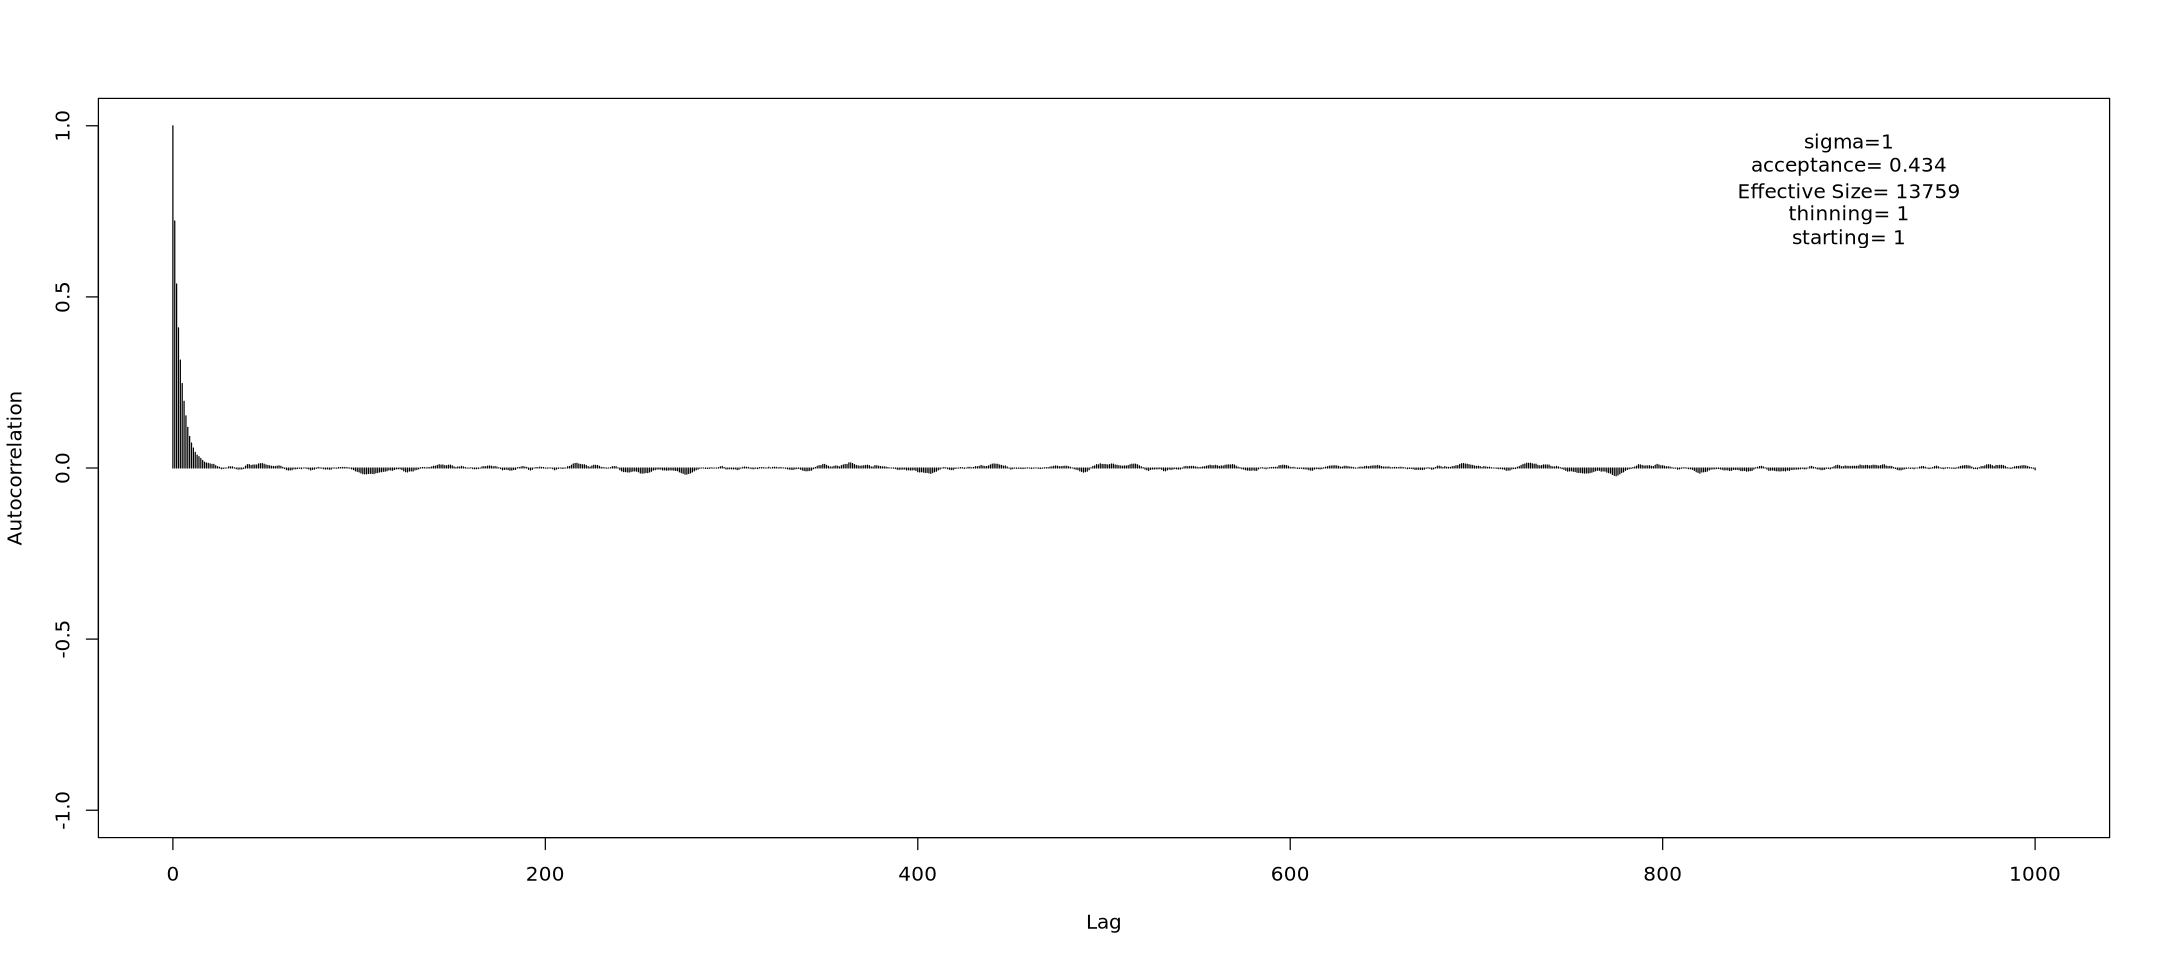

In [236]:
#Plotting chain autocorrelation
options(repr.plot.width = 18, repr.plot.height = 8)
autocorr.plot(MCMC[,2], auto.layout = FALSE,lag.max=1000)

text(900,0.95,paste("sigma=1"))
text(900,0.88,paste("acceptance=",round(chain[1,3],3)))
text(900,0.81,paste("Effective Size=",round(effectiveSize(MCMC[,2]),0)))
text(900,0.74,paste("thinning=",thinning))
text(900,0.67,paste("starting=",starting))

- try to use different burn-in cycles and thinning and plot the corresponding posterior distribution
and the chain autocorrelation function. What are the best parameters ?

### Exercise 2

- A set of measured data should follow, according to the physics model applied to them, a linear
behavior. Data are the following:

Y -7.821 -1.494 -15.444 -10.807 -13.735 -14.442 -15.892 -18.326

X 5 6 7 8 9 10 11 12

- perform a simple linear regression model running a Markov Chain Monte Carlo with JAGS, assuming
that data follow the model:

Z[i] = a + b * X[i];

- and the likelihood of the measured data follow a Gaussian likelihood distribution:

Y[i] ~dnorm(Z[i], c)

- you can constrain the parameter a, b and c to the following intervals: a [1; 10], b [-1; 3] and
c [0:034; 4]

- run JAGS experimenting with the burnin and number of iterations of the chain. Plot the evolution
of the chains and the posterior distributions of a and b. Compute the 95% credibility interval for
the parameters.

- using the obtained posterior distributions, compute the posterior distribution of $\sigma =1/\sqrt{c}$

In [ ]:
y<-c( -7.821, -1.494, -15.444, -10.807, -13.735, -14.442, -15.892, -18.326)
x<-c(5, 6, 7, 8, 9, 10, 11, 12)

### Exercise 3

- suppose we observe the following values
  
x = 2.06, 5.56, 7.93, 6.56, 205
- and we assume that the data come from a gaussian distribution with unknown mean m and variance 
- build a simple JAGS model and run a Markov Chain Monte Carlo to obtain the posterior distribution of the mean and variance.
- Assume uniform prior distributions for the parameters, m ~dunif(-10, 10) and s ~dunif(0,50)
- compute also the posterior distribution for m/s

### Exercise 4

- The data set that Edwin Hubble ised to show that galaxies are moving either away or towards us are given in the following table:
- Using this data set define a JAGS model to fit data with the following:
V[i] ~dnorm(b * D[i], c)
- where V represent the velocity in units of km/s, D is the observed distance (in units of parsec),
and b and c are two parameters of the model
- assume whatever prior distribution you think is appropriate
- plot the evolution of the chains, the posterior distribution of the parameters and the 95% credibility
interval